In [22]:
import os
import pandas as pd
import read_txz as txz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
basedir = 'compress'

In [24]:
all_fs = sorted(os.listdir(basedir))
group_fs = {}
for f in all_fs:
    ff = f.split('-')
    cat = ff[1]
    pset  = ff[2].split('_')[-1]
    if not cat in group_fs: group_fs[cat] = {}
    if not pset in group_fs[cat]: group_fs[cat][pset] = []
    group_fs[cat][pset].append(f)

In [14]:
group_fs.keys()

dict_keys(['couple_prob', 'divorce_prob', 'leaving_prob'])

In [15]:
group_fs['couple_prob'].keys()

dict_keys(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0', '0.00', '0.01', '0.02', '0.03', '0.04', '0.05', '0.06', '0.07', '0.08', '0.09', '0.10', '0.040', '0.041', '0.042', '0.043', '0.044', '0.045', '0.046', '0.047', '0.048', '0.049', '0.050'])

In [20]:
cat = 'couple_prob'
df_couple = None
for k,v in group_fs[cat].items():
    fp = os.path.join(basedir, v)
    df = txz.read_df_from_txz(fp, 'household_size_dynamic.csv')
    df[cat] = float(k)
    if df_couple is None:
        df_couple = df
    df_couple = df_couple.append(df)


In [21]:
df_couple.head(20)

,ind,time,size_up,size_down,new_household,sub_total,couple_prob
0,0,1,94,189,53,336,0.0
1,1,2,73,156,50,279,0.0
2,2,3,94,164,50,308,0.0
3,3,4,87,177,56,320,0.0
4,4,5,63,165,49,277,0.0
5,5,6,48,197,61,306,0.0
6,6,7,72,183,55,310,0.0
7,7,8,73,203,53,329,0.0
8,8,9,66,190,64,320,0.0
9,9,10,40,193,52,285,0.0


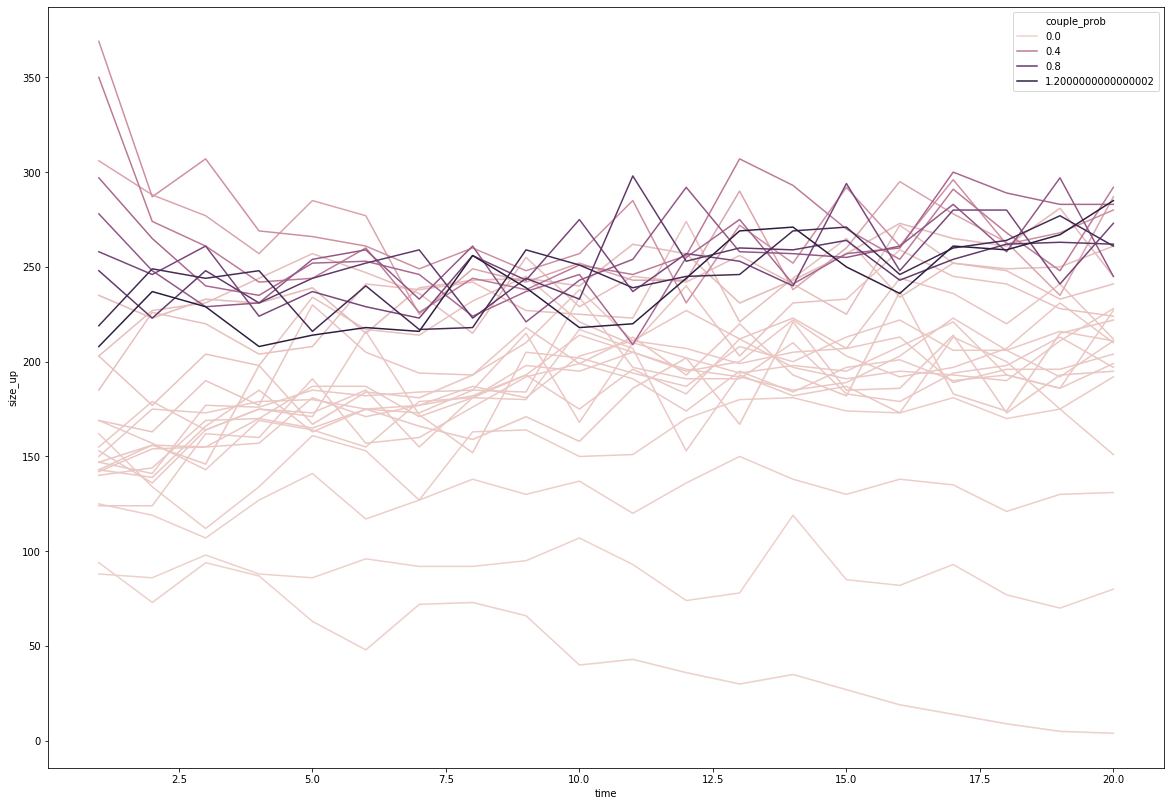

In [23]:
fig, ax = plt.subplots(figsize=(20,14))
sns.lineplot(x='time', y='size_up', hue='couple_prob', data=df_couple, ax=ax)